In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yelp-dataset/Dataset_User_Agreement.pdf
/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_checkin.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_tip.json
/kaggle/input/yelp-dataset/yelp_academic_dataset_user.json


1. Loading and exploring the JSON data in the notebook

In [2]:
# Import necessary libraries
import pandas as pd

# Define file paths
review_path = '/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json'
checkin_path = '/kaggle/input/yelp-dataset/yelp_academic_dataset_checkin.json'
business_path = '/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json'
tip_path = '/kaggle/input/yelp-dataset/yelp_academic_dataset_tip.json'
user_path = '/kaggle/input/yelp-dataset/yelp_academic_dataset_user.json'

# Load the data with chunksize for large files to avoid memory issues
chunksize = 50000  # Adjust based on memory availability

# Load a sample chunk to inspect the structure of the review data
review_chunk = pd.read_json(review_path, lines=True, chunksize=chunksize)
review_df = next(review_chunk)
print("Review Data Sample:")
print(review_df.head())
print("\nReview Data Columns:")
print(review_df.columns)

# Load a sample chunk to inspect the structure of the check-in data
checkin_df = pd.read_json(checkin_path, lines=True)
print("\nCheck-in Data Sample:")
print(checkin_df.head())
print("\nCheck-in Data Columns:")
print(checkin_df.columns)

# Load a sample chunk to inspect the structure of the business data
business_chunk = pd.read_json(business_path, lines=True, chunksize=chunksize)
business_df = next(business_chunk)
print("\nBusiness Data Sample:")
print(business_df.head())
print("\nBusiness Data Columns:")
print(business_df.columns)

# Load the entire tip data (smaller file)
tip_df = pd.read_json(tip_path, lines=True)
print("\nTip Data Sample:")
print(tip_df.head())
print("\nTip Data Columns:")
print(tip_df.columns)

# Load the entire user data (smaller file)
user_chunk = pd.read_json(user_path, lines=True, chunksize=chunksize)
user_df = next(user_chunk)
print("\nUser Data Sample:")
print(user_df.head())
print("\nUser Data Columns:")
print(user_df.columns)

# Additional exploration
print("\nSummary of the Review DataFrame:")
print(review_df.info())

print("\nSummary of the Business DataFrame:")
print(business_df.info())


Review Data Sample:
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, di

2. Converting JSON data to a Pandas DataFrame and further exploration

In [4]:
# Load complete Review data in chunks and concatenate into a single DataFrame
review_df = pd.concat(pd.read_json(review_path, lines=True, chunksize=chunksize))
print("\nReview DataFrame Loaded:")
print(review_df.head())
print("\nReview DataFrame Info:")
print(review_df.info())

# Load complete Business data in chunks and concatenate into a single DataFrame
business_df = pd.concat(pd.read_json(business_path, lines=True, chunksize=chunksize))
print("\nBusiness DataFrame Loaded:")
print(business_df.head())
print("\nBusiness DataFrame Info:")
print(business_df.info())

# Load Check-in data (smaller dataset, can be loaded directly)
checkin_df = pd.read_json(checkin_path, lines=True)
print("\nCheck-in DataFrame Loaded:")
print(checkin_df.head())
print("\nCheck-in DataFrame Info:")
print(checkin_df.info())

# Load Tip data (smaller dataset, can be loaded directly)
tip_df = pd.read_json(tip_path, lines=True)
print("\nTip DataFrame Loaded:")
print(tip_df.head())
print("\nTip DataFrame Info:")
print(tip_df.info())

# Load complete User data in chunks and concatenate into a single DataFrame
user_df = pd.concat(pd.read_json(user_path, lines=True, chunksize=chunksize))
print("\nUser DataFrame Loaded:")
print(user_df.head())
print("\nUser DataFrame Info:")
print(user_df.info())

# Check for missing values in each DataFrame
print("\nMissing Values in Review DataFrame:")
print(review_df.isnull().sum())

print("\nMissing Values in Business DataFrame:")
print(business_df.isnull().sum())

print("\nMissing Values in Check-in DataFrame:")
print(checkin_df.isnull().sum())

print("\nMissing Values in Tip DataFrame:")
print(tip_df.isnull().sum())

print("\nMissing Values in User DataFrame:")
print(user_df.isnull().sum())


Review DataFrame Loaded:
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yum

3. Code written to explore the structure, time period, and scope of the data
4. Comprehensive documentation and commenting on the code

In [5]:
# Exploratory Data Analysis for Structure, Time Period, and Scope of the Data

# 1. Structure Analysis
print("\nExploring the structure of the Review DataFrame:")
print(review_df.info())
print("\nFirst 5 rows of the Review DataFrame:")
print(review_df.head())

print("\nExploring the structure of the Business DataFrame:")
print(business_df.info())
print("\nFirst 5 rows of the Business DataFrame:")
print(business_df.head())

print("\nExploring the structure of the Check-in DataFrame:")
print(checkin_df.info())
print("\nFirst 5 rows of the Check-in DataFrame:")
print(checkin_df.head())

print("\nExploring the structure of the Tip DataFrame:")
print(tip_df.info())
print("\nFirst 5 rows of the Tip DataFrame:")
print(tip_df.head())

print("\nExploring the structure of the User DataFrame:")
print(user_df.info())
print("\nFirst 5 rows of the User DataFrame:")
print(user_df.head())

# 2. Time Period Analysis
# Finding the earliest and latest dates in each DataFrame (where applicable)
print("\nTime Period Analysis:")
print("Earliest and Latest Dates in Review DataFrame:")
print("Earliest:", review_df['date'].min(), " | Latest:", review_df['date'].max())

print("\nEarliest and Latest Dates in Check-in DataFrame:")
checkin_dates = checkin_df['date'].str.split(', ').explode()
print("Earliest:", checkin_dates.min(), " | Latest:", checkin_dates.max())

print("\nEarliest and Latest Dates in Tip DataFrame:")
print("Earliest:", tip_df['date'].min(), " | Latest:", tip_df['date'].max())

print("\nEarliest and Latest Dates in User DataFrame (Yelping Since):")
print("Earliest:", pd.to_datetime(user_df['yelping_since']).min(), " | Latest:", pd.to_datetime(user_df['yelping_since']).max())

# 3. Data Scope Analysis
print("\nData Scope Analysis:")
print("Number of unique businesses in the Review DataFrame:", review_df['business_id'].nunique())
print("Number of unique businesses in the Business DataFrame:", business_df['business_id'].nunique())
print("Number of unique users in the Review DataFrame:", review_df['user_id'].nunique())
print("Number of unique users in the User DataFrame:", user_df['user_id'].nunique())

# Checking for missing values
print("\nMissing Values Analysis:")
print("Missing values in Review DataFrame:\n", review_df.isnull().sum())
print("\nMissing values in Business DataFrame:\n", business_df.isnull().sum())
print("\nMissing values in Check-in DataFrame:\n", checkin_df.isnull().sum())
print("\nMissing values in Tip DataFrame:\n", tip_df.isnull().sum())
print("\nMissing values in User DataFrame:\n", user_df.isnull().sum())



Exploring the structure of the Review DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB
None

First 5 rows of the Review DataFrame:
                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  k

In [8]:
# Normalize the 'attributes' column
if 'attributes' in business_df.columns:
    # Drop NoneType values and normalize the dictionary
    attributes_df = pd.json_normalize(business_df['attributes'].dropna())
    # Concatenate the normalized attributes back to the main DataFrame
    business_df = pd.concat([business_df.drop(columns=['attributes']), attributes_df], axis=1)

# Normalize the 'hours' column
if 'hours' in business_df.columns:
    # Drop NoneType values and normalize the dictionary
    hours_df = pd.json_normalize(business_df['hours'].dropna())
    # Concatenate the normalized hours back to the main DataFrame
    business_df = pd.concat([business_df.drop(columns=['hours']), hours_df], axis=1)

# Display the processed data
print("\nFlattened Business DataFrame Sample:")
print(business_df.head())

# Check column names and data types
print("\nBusiness DataFrame columns after normalization:")
print(business_df.info())



Flattened Business DataFrame Sample:
              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  ...  RestaurantsCounterService  \
0  34.426679 -119.711197    5.0             7  ...                        NaN   
1  38.551126  -90.335695    3.0           

5. Converting JSON data for MySQL database compatibility
6. Creating all tables in Azure
7. This criterion is linked to a Learning OutcomeAll data in all tables ported over

In [1]:
# Install pyodbc
!pip install pyodbc

# Update package list and install unixodbc and development headers
!apt-get update
!apt-get install -y unixodbc unixodbc-dev

# Add Microsoft's signing key and repository for SQL Server ODBC Driver
!curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
!curl https://packages.microsoft.com/config/ubuntu/$(lsb_release -rs)/prod.list | tee /etc/apt/sources.list.d/mssql-release.list

# Update the package list again after adding Microsoft's repository
!apt-get update

# Install Microsoft SQL Server ODBC Driver 17
!ACCEPT_EULA=Y apt-get install -y msodbcsql17

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.0/336.0 kB 8.3 MB/s eta 0:00:00:00:01
Get:1 https://packages.cloud.google.com/apt gcsfuse-focal InRelease [1227 B]
Get:2 https://packages.cloud.google.com/apt cloud-sdk InRelease [1618 B]       
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]
Get:5 https://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [28.6 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [128 kB]        
Get:7 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [3446 kB]
Get:8 https://packages.cloud.google.com/apt cloud-sdk/main all Packages [1588 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [128 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [30.9 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1279 kB]
Get:12 http:/

In [2]:
 # Import necessary libraries
import pandas as pd
from sqlalchemy import create_engine, types
import sqlalchemy

# Set up Azure SQL connection parameters
username = 'ph17@ph17-server'  # Replace with your actual username
password = 'MSBA2024!hpy'  # Replace with your actual password
server = 'ph17-server.database.windows.net'  # Replace with your server name
database = 'ph17-db'  # Replace with your database name

# Create the connection engine
connection_string = f"mssql+pyodbc://{username}:{password}@{server}:1433/{database}?driver=ODBC+Driver+17+for+SQL+Server"
engine = create_engine(connection_string)

# Load business data in chunks
chunksize = 50000  # Adjust as needed for memory
business_path = '/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json'

# Convert JSON columns to string to ensure compatibility
for chunk in pd.read_json(business_path, lines=True, chunksize=chunksize):
    chunk['attributes'] = chunk['attributes'].astype(str)
    chunk['hours'] = chunk['hours'].astype(str)

    # Upload the chunk to Azure SQL with data types specified
    chunk.to_sql(
    name='business_table',
    con=engine,
    if_exists='append',
    index=False,
    chunksize=5000,
    dtype={
        'business_id': sqlalchemy.types.VARCHAR(255),
        'name': sqlalchemy.types.VARCHAR(255),
        'address': sqlalchemy.types.VARCHAR(255),
        'city': sqlalchemy.types.VARCHAR(255),
        'state': sqlalchemy.types.VARCHAR(50),
        'postal_code': sqlalchemy.types.VARCHAR(20),
        'latitude': sqlalchemy.types.Float,
        'longitude': sqlalchemy.types.Float,
        'stars': sqlalchemy.types.Float,
        'review_count': sqlalchemy.types.BigInteger,
        'is_open': sqlalchemy.types.BigInteger,
        'attributes': sqlalchemy.types.NVARCHAR(4000),  
        'categories': sqlalchemy.types.VARCHAR(4000),  
        'hours': sqlalchemy.types.NVARCHAR(4000)      
    }
)

print("Business data uploaded successfully with JSON columns converted for compatibility.")



KeyboardInterrupt



In [ ]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine

# Database connection details
username = 'ph17@ph17-server'  # Your actual username
password = 'MSBA2024!hpy'  # Your actual password
server = 'ph17-server.database.windows.net'  # Your server name
database = 'ph17-db'  # Your database name

# Creating the connection string
connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

# Create the engine
engine = create_engine(connection_string)

# Load the check-in data from JSON file
checkin_path = '/kaggle/input/yelp-dataset/yelp_academic_dataset_checkin.json'
checkin_df = pd.read_json(checkin_path, lines=True)

# Split and explode the date column so each timestamp is in a separate row
checkin_df['date'] = checkin_df['date'].str.split(', ')
checkin_df = checkin_df.explode('date').reset_index(drop=True)  # Reset index to avoid duplicate labels

# Convert 'date' column to datetime format
checkin_df['date'] = pd.to_datetime(checkin_df['date'], errors='coerce')

# Upload the data to Azure SQL
checkin_df.to_sql(
    name='checkin_table',
    con=engine,
    if_exists='replace',  # 'replace' will overwrite the table, use 'append' to add data
    index=False,
    chunksize=50000,  # Upload data in larger chunks for efficiency
    dtype={
        'business_id': sqlalchemy.types.VARCHAR(255),
        'date': sqlalchemy.types.DATETIME  # Ensure the date column is stored as a DATETIME type
    }
)

print("Check-in data successfully uploaded to Azure SQL.")


In [ ]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine

# Database connection details
username = 'ph17@ph17-server'  # Your actual username
password = 'MSBA2024!hpy'  # Your actual password
server = 'ph17-server.database.windows.net'  # Your server name
database = 'ph17-db'  # Your database name

# Creating the connection string
connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

# Create the engine
engine = create_engine(connection_string)

# Load the tip data from JSON file
tip_path = '/kaggle/input/yelp-dataset/yelp_academic_dataset_tip.json'
tip_df = pd.read_json(tip_path, lines=True)

# Convert 'date' column to datetime format
tip_df['date'] = pd.to_datetime(tip_df['date'], errors='coerce')

# Upload the data to Azure SQL
tip_df.to_sql(
    name='tip_table',
    con=engine,
    if_exists='replace',  # 'replace' will overwrite the table, use 'append' to add data
    index=False,
    chunksize=50000,  # Upload data in larger chunks for efficiency
    dtype={
        'user_id': sqlalchemy.types.VARCHAR(255),
        'business_id': sqlalchemy.types.VARCHAR(255),
        'text': sqlalchemy.types.TEXT,
        'date': sqlalchemy.types.DATETIME,
        'compliment_count': sqlalchemy.types.INTEGER
    }
)

print("Tip data successfully uploaded to Azure SQL.")


In [ ]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine

# Database connection details
username = 'ph17@ph17-server'  # Your actual username
password = 'MSBA2024!hpy'  # Your actual password
server = 'ph17-server.database.windows.net'  # Your server name
database = 'ph17-db'  # Your database name

# Creating the connection string
connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

# Create the engine
engine = create_engine(connection_string)

# Load the user data from JSON file
user_path = '/kaggle/input/yelp-dataset/yelp_academic_dataset_user.json'
user_df = pd.read_json(user_path, lines=True)

# Convert any datetime columns if needed and handle large text data
user_df['yelping_since'] = pd.to_datetime(user_df['yelping_since'], errors='coerce')

# Upload the data to Azure SQL
user_df.to_sql(
    name='user_table',
    con=engine,
    if_exists='replace',  # 'replace' will overwrite the table, use 'append' to add data
    index=False,
    chunksize=50000,  # Upload data in larger chunks for efficiency
    dtype={
        'user_id': sqlalchemy.types.VARCHAR(255),
        'name': sqlalchemy.types.VARCHAR(255),
        'review_count': sqlalchemy.types.INTEGER,
        'yelping_since': sqlalchemy.types.DATETIME,
        'useful': sqlalchemy.types.INTEGER,
        'funny': sqlalchemy.types.INTEGER,
        'cool': sqlalchemy.types.INTEGER,
        'fans': sqlalchemy.types.INTEGER,
        'elite': sqlalchemy.types.TEXT,
        'average_stars': sqlalchemy.types.FLOAT,
        'compliment_hot': sqlalchemy.types.INTEGER,
        'compliment_more': sqlalchemy.types.INTEGER,
        'compliment_profile': sqlalchemy.types.INTEGER,
        'compliment_cute': sqlalchemy.types.INTEGER,
        'compliment_list': sqlalchemy.types.INTEGER,
        'compliment_note': sqlalchemy.types.INTEGER,
        'compliment_plain': sqlalchemy.types.INTEGER,
        'compliment_cool': sqlalchemy.types.INTEGER,
        'compliment_funny': sqlalchemy.types.INTEGER,
        'compliment_writer': sqlalchemy.types.INTEGER,
        'compliment_photos': sqlalchemy.types.INTEGER
    }
)

print("User data successfully uploaded to Azure SQL.")


In [ ]:
import pandas as pd
import sqlalchemy
from sqlalchemy import create_engine

# Database connection details
username = 'ph17@ph17-server'  # Your actual username
password = 'MSBA2024!hpy'  # Your actual password
server = 'ph17-server.database.windows.net'  # Your server name
database = 'ph17-db'  # Your database name

# Creating the connection string
connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

# Create the engine
engine = create_engine(connection_string)

# Define the path to the review data
review_path = '/kaggle/input/yelp-dataset/yelp_academic_dataset_review.json'

# Define the chunk size for reading the JSON file
chunk_size = 100000  # You can adjust this size based on available memory

# Read and upload data in chunks
reader = pd.read_json(review_path, lines=True, chunksize=chunk_size)

for chunk in reader:
    # Convert 'date' column to datetime format
    chunk['date'] = pd.to_datetime(chunk['date'], errors='coerce')
    
    # Upload the chunk to Azure SQL
    chunk.to_sql(
        name='review_table',
        con=engine,
        if_exists='append',  # Append data to avoid replacing the table each time
        index=False,
        dtype={
            'review_id': sqlalchemy.types.VARCHAR(255),
            'user_id': sqlalchemy.types.VARCHAR(255),
            'business_id': sqlalchemy.types.VARCHAR(255),
            'stars': sqlalchemy.types.INTEGER,
            'useful': sqlalchemy.types.INTEGER,
            'funny': sqlalchemy.types.INTEGER,
            'cool': sqlalchemy.types.INTEGER,
            'text': sqlalchemy.types.TEXT,
            'date': sqlalchemy.types.DATETIME
        }
    )

print("Review data successfully uploaded to Azure SQL.")

8. Break apart multi valued attributes into tables

In [ ]:
import pandas as pd
import json
import sqlalchemy
from sqlalchemy import create_engine

# Database connection details
username = 'ph17@ph17-server'  # Your actual username
password = 'MSBA2024!hpy'  # Your actual password
server = 'ph17-server.database.windows.net'  # Your server name
database = 'ph17-db'  # Your database name

# Creating the connection string
connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

# Create the engine
engine = create_engine(connection_string)

# Load the business data
business_path = '/kaggle/input/yelp-dataset/yelp_academic_dataset_business.json'
business_df = pd.read_json(business_path, lines=True)

# Safely parse the 'attributes' column if it's a string
business_df['attributes'] = business_df['attributes'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Normalize the 'attributes' column into separate columns
attributes_df = pd.json_normalize(business_df['attributes'].dropna())
attributes_df['business_id'] = business_df.loc[attributes_df.index, 'business_id']  # Add business_id for referencing

# Upload the attributes table to Azure
attributes_df.to_sql(
    name='attributes_table',
    con=engine,
    if_exists='replace',
    index=False,
    chunksize=100000,
    dtype={col: sqlalchemy.types.VARCHAR(255) for col in attributes_df.columns}
)

# Safely parse the 'hours' column if it's a string
business_df['hours'] = business_df['hours'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Normalize the 'hours' column into separate columns
hours_df = pd.json_normalize(business_df['hours'].dropna())
hours_df['business_id'] = business_df.loc[hours_df.index, 'business_id']  # Add business_id for referencing

# Upload the hours table to Azure
hours_df.to_sql(
    name='hours_table',
    con=engine,
    if_exists='replace',
    index=False,
    chunksize=5000,
    dtype={col: sqlalchemy.types.VARCHAR(255) for col in hours_df.columns}
)

print("Attributes and Hours data normalized and uploaded successfully.")


9. Setting appropriate metadata, referencing yelp_champaign database specifications

https://docs.google.com/document/d/1SjmV14QoW_QPXuH55wtG5zEepSTFkd-mPO1KmFyCaYE/edit?usp=sharing

In [3]:
# Install necessary Python packages
!pip install pyodbc sqlalchemy
!apt-get update
!apt-get install -y unixodbc unixodbc-dev
!curl https://packages.microsoft.com/keys/microsoft.asc | apt-key add -
!curl https://packages.microsoft.com/config/ubuntu/$(lsb_release -rs)/prod.list | tee /etc/apt/sources.list.d/mssql-release.list
!apt-get update
!ACCEPT_EULA=Y apt-get install -y msodbcsql17
!apt-get install -y unixodbc-dev


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.0/336.0 kB 4.6 MB/s eta 0:00:0000:0100:01
Get:1 https://packages.cloud.google.com/apt gcsfuse-focal InRelease [1227 B]
Get:2 https://packages.cloud.google.com/apt cloud-sdk InRelease [1618 B]       
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]      
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:5 https://packages.cloud.google.com/apt gcsfuse-focal/main amd64 Packages [28.6 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [128 kB]        
Get:7 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [3446 kB]
Get:8 https://packages.cloud.google.com/apt cloud-sdk/main all Packages [1588 kB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [30.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [128 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [4144 kB]
G

In [6]:
import pandas as pd
from sqlalchemy import create_engine

# Set up the Azure SQL connection details
username = 'ph17@ph17-server'  # Replace with your actual username
password = 'MSBA2024!hpy'      # Replace with your actual password
server = 'ph17-server.database.windows.net'  # Replace with your server name
database = 'ph17-db'           # Replace with your database name

# Create the connection engine
connection_string = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
engine = create_engine(connection_string)


10. Formulating 10 SQL queries relevant to starting a new restaurant (0.3 points for each query)
11. Queries providing insightful information for decision-making (0.3 points for each query)

Query 1: Most Common Restaurant Categories

Insight: Identifies popular restaurant categories in the area, which can help potential restaurant owners understand market saturation and identify unique niche opportunities.

Decision-making value: Helps entrepreneurs decide on the type of cuisine or restaurant to open that would stand out from existing competition.

In [15]:
# Query 1: Find the most common categories of restaurants
query1 = """SELECT TOP 10 categories, COUNT(*) AS num_restaurants
FROM business_table WHERE categories LIKE '%Restaurant%' GROUP BY categories
ORDER BY num_restaurants DESC;"""
df1 = pd.read_sql_query(query1, engine)
print("Most common restaurant categories:"); print(df1)

Most common restaurant categories:
                    categories  num_restaurants
0           Restaurants, Pizza              935
1           Pizza, Restaurants              823
2         Restaurants, Mexican              728
3         Restaurants, Chinese              708
4         Mexican, Restaurants              672
5         Chinese, Restaurants              651
6         Italian, Restaurants              328
7         Restaurants, Italian              285
8  Restaurants, American (New)              247
9  American (New), Restaurants              235


Query 2: Top-Rated Restaurants

Insight: Lists the highest-rated restaurants, showcasing what successful establishments have in common (e.g., type of cuisine, location).

Decision-making value: Offers insights into what customers value most, such as quality and service, guiding potential owners on setting high standards for their new venture.

In [16]:
# Query 2: Identify the top-rated restaurants
query2 = """SELECT name, stars, review_count FROM business_table
WHERE categories LIKE '%Restaurant%' ORDER BY stars DESC, review_count DESC
OFFSET 0 ROWS FETCH NEXT 10 ROWS ONLY;"""
df2 = pd.read_sql_query(query2, engine)
print("Top-rated restaurants:"); print(df2)

Top-rated restaurants:
                                 name  stars  review_count
0                     Blues City Deli    5.0           991
1                    Carlillos Cocina    5.0           799
2                            Tumerico    5.0           705
3                                Yats    5.0           623
4             Smiling With Hope Pizza    5.0           526
5  Barracuda Deli Cafe St. Pete Beach    5.0           521
6                         Cafe Soleil    5.0           468
7                         Kaffe Crepe    5.0           454
8                          Buena Onda    5.0           414
9                       Big Al's Deli    5.0           390


Query 3: Restaurants with the Highest Number of Reviews

Insight: Highlights restaurants with significant customer engagement. A high number of reviews often correlates with popularity and brand awareness.

Decision-making value: Helps entrepreneurs understand which restaurants are highly visited and why, informing marketing strategies and service standards.

In [17]:
# Query 3: Find the restaurants with the highest number of reviews
query3 = """SELECT name, review_count, stars FROM business_table
WHERE categories LIKE '%Restaurant%' ORDER BY review_count DESC
OFFSET 0 ROWS FETCH NEXT 10 ROWS ONLY;"""
df3 = pd.read_sql_query(query3, engine)
print("Restaurants with the highest number of reviews:"); print(df3)

Restaurants with the highest number of reviews:
                                 name  review_count  stars
0                   Acme Oyster House          7568    4.0
1                        Oceana Grill          7400    4.0
2  Hattie B’s Hot Chicken - Nashville          6093    4.5
3             Reading Terminal Market          5721    4.5
4          Ruby Slipper - New Orleans          5193    4.5
5                 Mother's Restaurant          5185    3.5
6                         Royal House          5070    4.0
7                  Commander's Palace          4876    4.5
8                                Luke          4554    4.0
9                              Cochon          4421    4.0


Query 4: Average Star Ratings for Restaurants in Specific Cities

Insight: Provides an overview of customer satisfaction levels by city, revealing potential opportunities or challenges in specific markets.

Decision-making value: Assists in deciding which city has the most satisfied customer base or where there is room for improvement and growth.

In [18]:
# Query 4: Get average star ratings for restaurants in specific cities
query4 = """SELECT city, AVG(stars) AS avg_rating FROM business_table
WHERE categories LIKE '%Restaurant%' GROUP BY city ORDER BY avg_rating DESC;"""
df4 = pd.read_sql_query(query4, engine)
print("Average star ratings for restaurants in specific cities:"); print(df4)

Average star ratings for restaurants in specific cities:
                 city  avg_rating
0          Bryn Athyn         5.0
1            Glendale         5.0
2            Hilltown         5.0
3           Kalispell         5.0
4    LOWER PROVIDENCE         5.0
..                ...         ...
843        Chalemette         1.5
844        Black Jack         1.5
845         Bellville         1.5
846           Algiers         1.5
847     Peerless Park         1.0

[848 rows x 2 columns]


Query 5: Peak Check-In Hours for Popular Restaurants

Insight: Shows the busiest hours for restaurants, helping new restaurant owners plan their staffing and operational hours.

Decision-making value: Informs decisions on scheduling staff shifts, promotions, and special offers during peak times to maximize revenue.

In [40]:
# Query 5: Identify peak check-in hours for popular restaurants
query5 = """SELECT business_id, FORMAT(date, 'HH') AS hour, COUNT(*) AS checkin_count
FROM checkin_table GROUP BY business_id, FORMAT(date, 'HH')
ORDER BY checkin_count DESC OFFSET 0 ROWS FETCH NEXT 10 ROWS ONLY;"""
df5 = pd.read_sql_query(query5, engine)
print("Peak check-in hours for popular restaurants:"); print(df5)

Peak check-in hours for popular restaurants:
              business_id hour  checkin_count
0  -QI8Qi8XWH3D8y8ethnajA   20           4186
1  -QI8Qi8XWH3D8y8ethnajA   21           4162
2  VQcCL9PiNL_wkGf-uF3fjg   00           3845
3  VQcCL9PiNL_wkGf-uF3fjg   01           3715
4  -QI8Qi8XWH3D8y8ethnajA   19           3497
5  VQcCL9PiNL_wkGf-uF3fjg   23           3315
6  -QI8Qi8XWH3D8y8ethnajA   18           3234
7  Eb1XmmLWyt_way5NNZ7-Pw   21           3170
8  -QI8Qi8XWH3D8y8ethnajA   22           3149
9  Eb1XmmLWyt_way5NNZ7-Pw   20           3138


Query 6: Most Active Users Who Visit Restaurants

Insight: Identifies top reviewers, who are often influencers or loyal customers. This can be valuable for targeted marketing campaigns.

Decision-making value: Offers a chance to build relationships with active community members who could help promote a new restaurant through word-of-mouth and social proof.

In [22]:
# Query 6: Find the most active users who visit restaurants
query6 = """SELECT user_id, COUNT(*) AS review_count FROM review_table
GROUP BY user_id ORDER BY review_count DESC OFFSET 0 ROWS FETCH NEXT 10 ROWS ONLY;"""
df6 = pd.read_sql_query(query6, engine)
print("Most active users who visit restaurants:"); print(df6)

Most active users who visit restaurants:
                  user_id  review_count
0  _BcWyKQL16ndpBdggh2kNA          8016
1  Xw7ZjaGfr0WNVt6s_5KZfA          4835
2  0Igx-a1wAstiBDerGxXk2A          4576
3  -G7Zkl1wIWBBmD0KRy_sCw          4372
4  ET8n-r7glWYqZhuR6GcdNw          4178
5  bYENop4BuQepBjM1-BI3fA          4135
6  1HM81n6n4iPIFU5d2Lokhw          4037
7  fr1Hz2acAb3OaL3l6DyKNg          3757
8  wXdbkFZsfDR7utJvbWElyA          3651
9  Um5bfs5DH6eizgjH3xZsvg          3641


Query 7: Common Positive Attributes of Highly Rated Restaurants

Insight: Reveals features and amenities (e.g., credit card acceptance, takeout options) that are associated with highly rated restaurants.

Decision-making value: Guides decision-makers on what attributes to include in their restaurant to attract positive reviews and customer satisfaction.

In [24]:
# Query 7: Identify common positive attributes of highly rated restaurants
query7 = """
SELECT 'BusinessAcceptsCreditCards' AS attribute_name, COUNT(*) AS count_positive
FROM attributes_table
JOIN business_table ON attributes_table.business_id = business_table.business_id
WHERE business_table.stars >= 4 AND attributes_table.BusinessAcceptsCreditCards = 'True'

UNION ALL

SELECT 'RestaurantsTakeOut' AS attribute_name, COUNT(*) AS count_positive
FROM attributes_table
JOIN business_table ON attributes_table.business_id = business_table.business_id
WHERE business_table.stars >= 4 AND attributes_table.RestaurantsTakeOut = 'True'

ORDER BY count_positive DESC;
"""
df7 = pd.read_sql_query(query7, engine)
print("Common positive attributes of highly rated restaurants:")
print(df7)


Common positive attributes of highly rated restaurants:
               attribute_name  count_positive
0  BusinessAcceptsCreditCards           56674
1          RestaurantsTakeOut           26295


Query 8: Restaurants with Extended Opening Hours

Insight: Identifies restaurants that operate for long hours, indicating a potential demand for late-night or early-morning service.

Decision-making value: Helps decide if extended hours are necessary to compete or to fill a niche market that other restaurants are not addressing.

In [25]:
# Query 8: Find restaurants with extended opening hours
query8 = """
SELECT business_id, 
       day_of_week,
       opening_time,
       closing_time,
       DATEDIFF(HOUR, opening_time, closing_time) AS hours_open
FROM (
    SELECT business_id, 
           'Monday' AS day_of_week,
           CONVERT(TIME, SUBSTRING(Monday, 1, CHARINDEX('-', Monday) - 1)) AS opening_time,
           CONVERT(TIME, SUBSTRING(Monday, CHARINDEX('-', Monday) + 1, LEN(Monday))) AS closing_time
    FROM hours_table
    WHERE Monday IS NOT NULL
    UNION ALL
    SELECT business_id, 
           'Tuesday',
           CONVERT(TIME, SUBSTRING(Tuesday, 1, CHARINDEX('-', Tuesday) - 1)),
           CONVERT(TIME, SUBSTRING(Tuesday, CHARINDEX('-', Tuesday) + 1, LEN(Tuesday)))
    FROM hours_table
    WHERE Tuesday IS NOT NULL
    UNION ALL
    SELECT business_id, 
           'Wednesday',
           CONVERT(TIME, SUBSTRING(Wednesday, 1, CHARINDEX('-', Wednesday) - 1)),
           CONVERT(TIME, SUBSTRING(Wednesday, CHARINDEX('-', Wednesday) + 1, LEN(Wednesday)))
    FROM hours_table
    WHERE Wednesday IS NOT NULL
    UNION ALL
    SELECT business_id, 
           'Thursday',
           CONVERT(TIME, SUBSTRING(Thursday, 1, CHARINDEX('-', Thursday) - 1)),
           CONVERT(TIME, SUBSTRING(Thursday, CHARINDEX('-', Thursday) + 1, LEN(Thursday)))
    FROM hours_table
    WHERE Thursday IS NOT NULL
    UNION ALL
    SELECT business_id, 
           'Friday',
           CONVERT(TIME, SUBSTRING(Friday, 1, CHARINDEX('-', Friday) - 1)),
           CONVERT(TIME, SUBSTRING(Friday, CHARINDEX('-', Friday) + 1, LEN(Friday)))
    FROM hours_table
    WHERE Friday IS NOT NULL
    UNION ALL
    SELECT business_id, 
           'Saturday',
           CONVERT(TIME, SUBSTRING(Saturday, 1, CHARINDEX('-', Saturday) - 1)),
           CONVERT(TIME, SUBSTRING(Saturday, CHARINDEX('-', Saturday) + 1, LEN(Saturday)))
    FROM hours_table
    WHERE Saturday IS NOT NULL
    UNION ALL
    SELECT business_id, 
           'Sunday',
           CONVERT(TIME, SUBSTRING(Sunday, 1, CHARINDEX('-', Sunday) - 1)),
           CONVERT(TIME, SUBSTRING(Sunday, CHARINDEX('-', Sunday) + 1, LEN(Sunday)))
    FROM hours_table
    WHERE Sunday IS NOT NULL
) AS parsed_hours
WHERE DATEDIFF(HOUR, opening_time, closing_time) >= 12;
"""

# Run the query and load the results into a DataFrame
df8 = pd.read_sql_query(query8, engine)
print("Restaurants with extended opening hours:")
print(df8)


Restaurants with extended opening hours:
                   business_id day_of_week opening_time closing_time  \
0       mpf3x-BjTdTEA3yCZrAYPw      Monday     08:00:00     22:00:00   
1       tUFrWirKiKi_TAnsVWINQQ      Monday     07:00:00     20:00:00   
2       k0hlBqXX-Bt0vf1op7Jr1w      Monday     09:30:00     21:30:00   
3       UJsufbvfyfONHeWdvAHKjA      Monday     06:00:00     22:00:00   
4       gbN4RuUiiBxQ2GBFQ2p3Cw      Monday     08:00:00     23:00:00   
...                        ...         ...          ...          ...   
146082  ckE45_JrmPgJ-DKYbV6IwA      Sunday     11:00:00     23:00:00   
146083  SBpuja7Z_xcmCiWtUHPaKQ      Sunday     08:00:00     21:00:00   
146084  x2sxfGcFKXoAUEXbZTaTow      Sunday     06:00:00     21:00:00   
146085  9SCZdPbyJHD1fF1k957DiQ      Sunday     07:00:00     20:00:00   
146086  jxLA8ikCHUJkvI8qWU09aw      Sunday     00:00:00     16:00:00   

        hours_open  
0               14  
1               13  
2               12  
3         

Query 9: Restaurants That Are Currently Open

Insight: Shows restaurants currently open, which is useful for assessing competition during specific hours.

Decision-making value: Assists in planning operational hours to differentiate from competitors, potentially attracting more customers during off-peak times.

In [26]:
# Query 9: List restaurants that are currently open
query9 = """SELECT name, city, stars, review_count FROM business_table
WHERE is_open = 1 AND categories LIKE '%Restaurant%'
ORDER BY stars DESC, review_count DESC OFFSET 0 ROWS FETCH NEXT 10 ROWS ONLY;"""
df9 = pd.read_sql_query(query9, engine)
print("Restaurants that are currently open:"); print(df9)

Restaurants that are currently open:
                                 name            city  stars  review_count
0                     Blues City Deli     Saint Louis    5.0           991
1                    Carlillos Cocina          Sparks    5.0           799
2                            Tumerico          Tucson    5.0           705
3                                Yats        Franklin    5.0           623
4             Smiling With Hope Pizza            Reno    5.0           526
5  Barracuda Deli Cafe St. Pete Beach   St Pete Beach    5.0           521
6                         Cafe Soleil  St. Pete Beach    5.0           468
7                         Kaffe Crepe            Reno    5.0           454
8                          Buena Onda   Santa Barbara    5.0           414
9                       Big Al's Deli       Nashville    5.0           390


Query 10: Number of Restaurants in Each State

Insight: Provides a count of restaurants by state, giving an idea of market saturation and potential opportunities in underrepresented areas.

Decision-making value: Helps decide which state or region has a higher or lower density of restaurants, guiding location decisions for new ventures.

In [8]:
# Query 10: Get the number of restaurants in each state
query10 = """SELECT state, COUNT(*) AS num_restaurants FROM business_table
WHERE categories LIKE '%Restaurant%' GROUP BY state ORDER BY num_restaurants DESC;"""
df10 = pd.read_sql_query(query10, engine)
print("Number of restaurants in each state:"); print(df10)

Number of restaurants in each state:
   state  num_restaurants
0     PA            12644
1     FL             8732
2     TN             4353
3     MO             4248
4     IN             4150
5     LA             3641
6     NJ             3343
7     AZ             2675
8     AB             2410
9     NV             1675
10    ID             1304
11    CA             1161
12    IL              983
13    DE              962
14    CO                1
15    HI                1
16   XMS                1
17    MT                1
18    NC                1


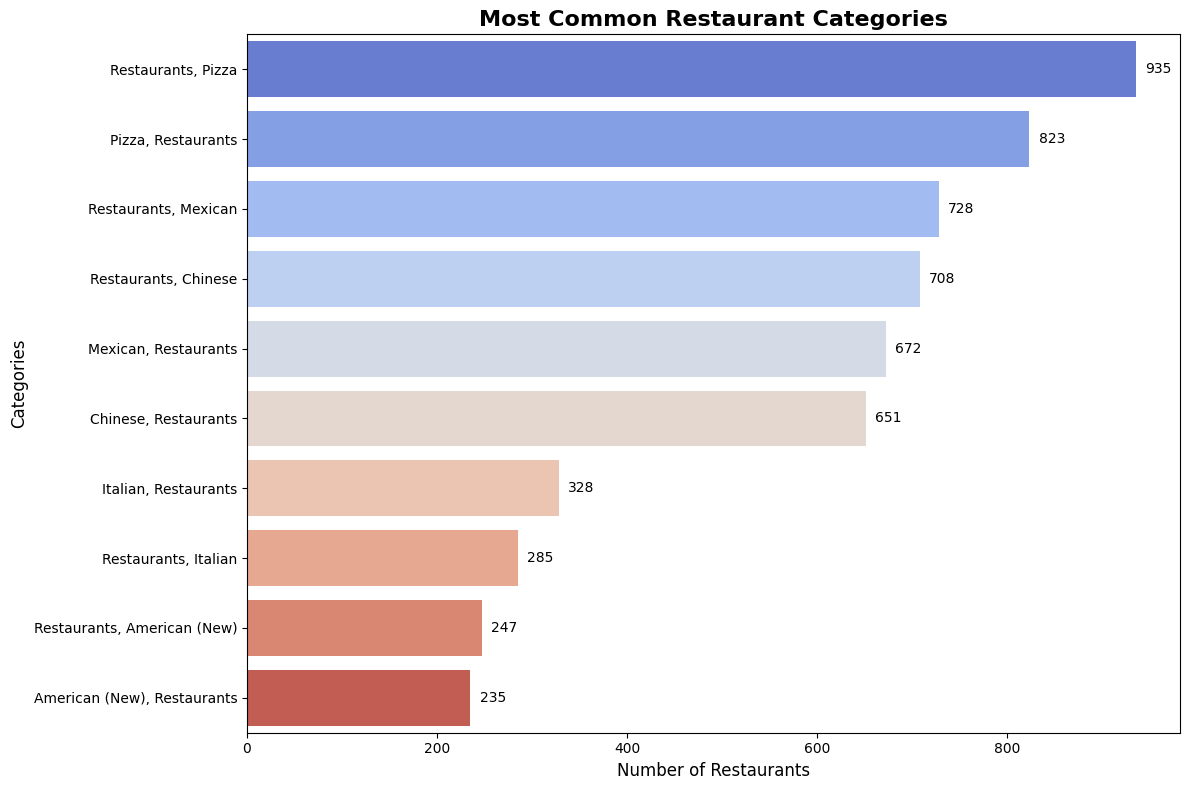

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `engine` is your database connection
query1 = """SELECT TOP 10 categories, COUNT(*) AS num_restaurants
FROM business_table 
WHERE categories LIKE '%Restaurant%' 
GROUP BY categories
ORDER BY num_restaurants DESC;"""
df1 = pd.read_sql_query(query1, engine)

# Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x=df1['num_restaurants'], y=df1['categories'], palette="coolwarm")
plt.xlabel("Number of Restaurants", fontsize=12)
plt.ylabel("Categories", fontsize=12)
plt.title("Most Common Restaurant Categories", fontsize=16, fontweight='bold')
for i, v in enumerate(df1['num_restaurants']):
    plt.text(v + 10, i, str(v), va='center', fontsize=10)
plt.tight_layout()
plt.show()


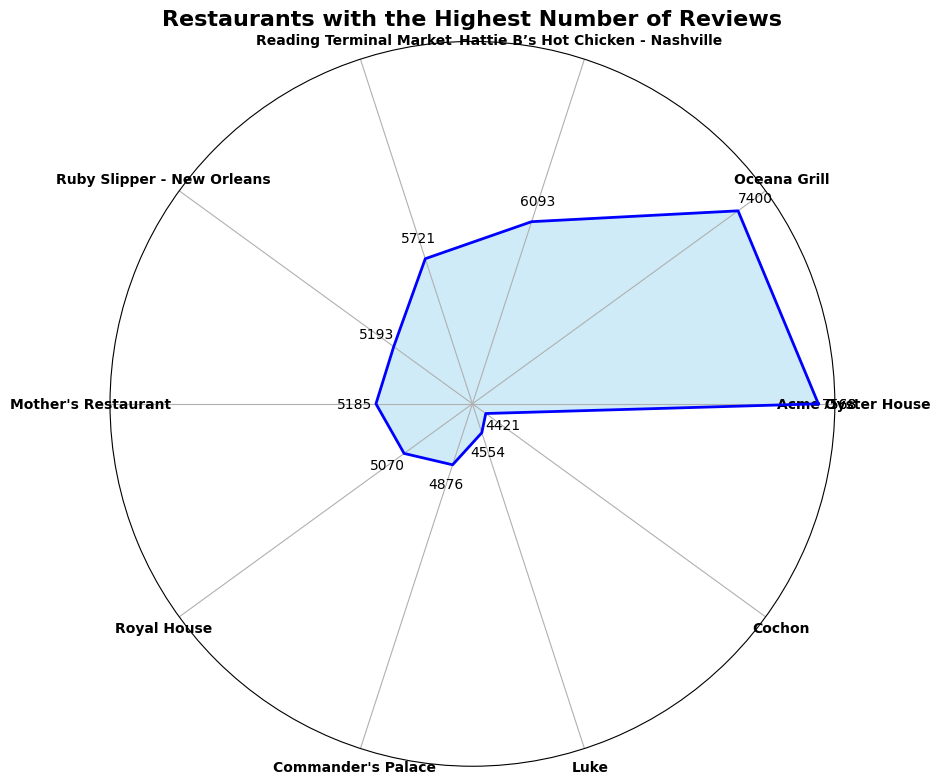

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Query 3 data preparation
names = df3['name'].tolist()
review_counts = df3['review_count'].tolist()

# Prepare data for the polar plot
angles = np.linspace(0, 2 * np.pi, len(names), endpoint=False).tolist()
angles += angles[:1]  # Close the circle
review_counts += review_counts[:1]  # Repeat the first value to close the circle

# Create the polar chart
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, review_counts, color='skyblue', alpha=0.4)
ax.plot(angles, review_counts, color='blue', linewidth=2)

# Add review counts as annotations
for angle, count in zip(angles, review_counts):
    x, y = np.cos(angle) * (count + 500), np.sin(angle) * (count + 500)  # Offset to position outside the chart
    ax.text(angle, count + 200, str(count), color="black", fontsize=10, ha="center", va="center")

# Configure the plot
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(names, fontsize=10, fontweight='bold')
plt.title("Restaurants with the Highest Number of Reviews", fontsize=16, fontweight='bold')

# Save the figure to a file
plt.tight_layout()
plt.savefig("highest_reviewed_restaurants_polar_chart.png", dpi=300, bbox_inches="tight")  # Save as PNG with high quality
plt.show()


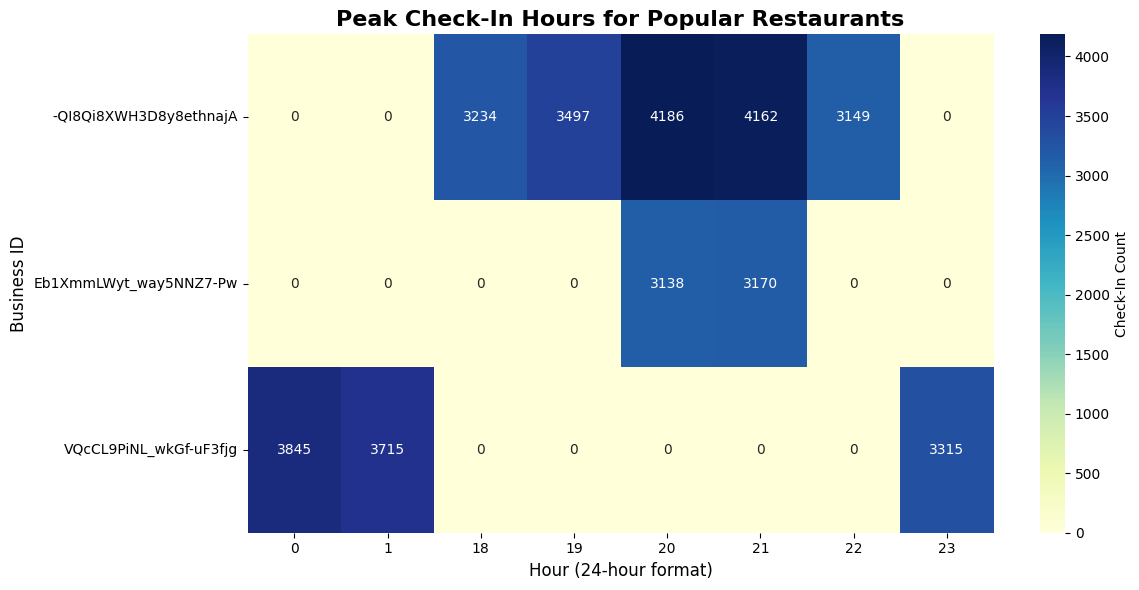

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure hour is numeric for proper sorting
df5['hour'] = df5['hour'].astype(int)

# Pivot the data for heatmap visualization
pivot = df5.pivot_table(values='checkin_count', index='business_id', columns='hour', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Check-In Count'})
plt.title("Peak Check-In Hours for Popular Restaurants", fontsize=16, fontweight='bold')
plt.xlabel("Hour (24-hour format)", fontsize=12)
plt.ylabel("Business ID", fontsize=12)
plt.tight_layout()
plt.show()


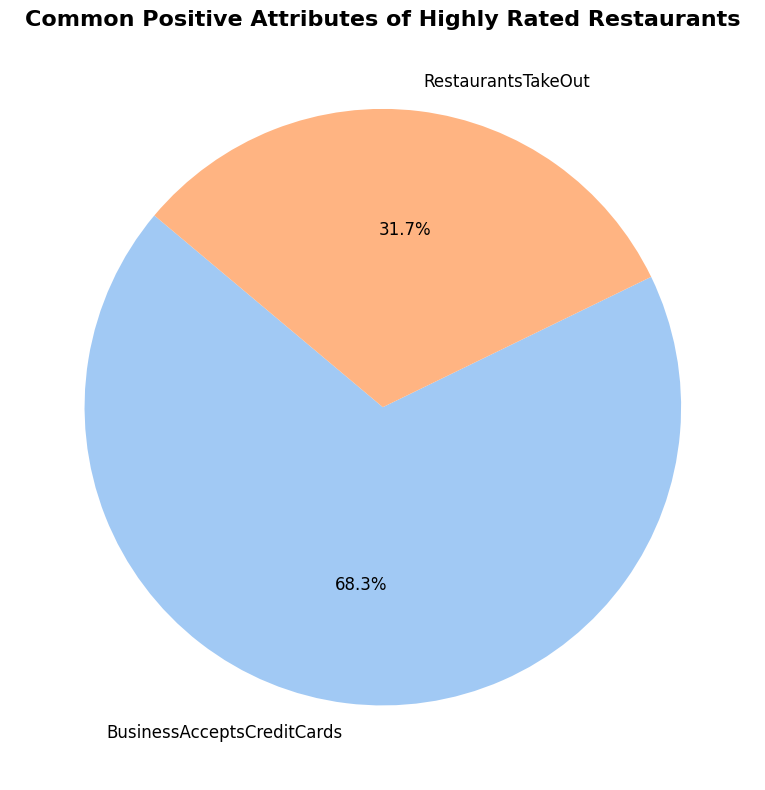

In [41]:
query7 = """
SELECT 'BusinessAcceptsCreditCards' AS attribute_name, COUNT(*) AS count_positive
FROM attributes_table
JOIN business_table ON attributes_table.business_id = business_table.business_id
WHERE business_table.stars >= 4 AND attributes_table.BusinessAcceptsCreditCards = 'True'

UNION ALL

SELECT 'RestaurantsTakeOut' AS attribute_name, COUNT(*) AS count_positive
FROM attributes_table
JOIN business_table ON attributes_table.business_id = business_table.business_id
WHERE business_table.stars >= 4 AND attributes_table.RestaurantsTakeOut = 'True'

ORDER BY count_positive DESC;
"""
df7 = pd.read_sql_query(query7, engine)

# Pie Chart Visualization
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
plt.pie(df7['count_positive'], labels=df7['attribute_name'], autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title("Common Positive Attributes of Highly Rated Restaurants", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


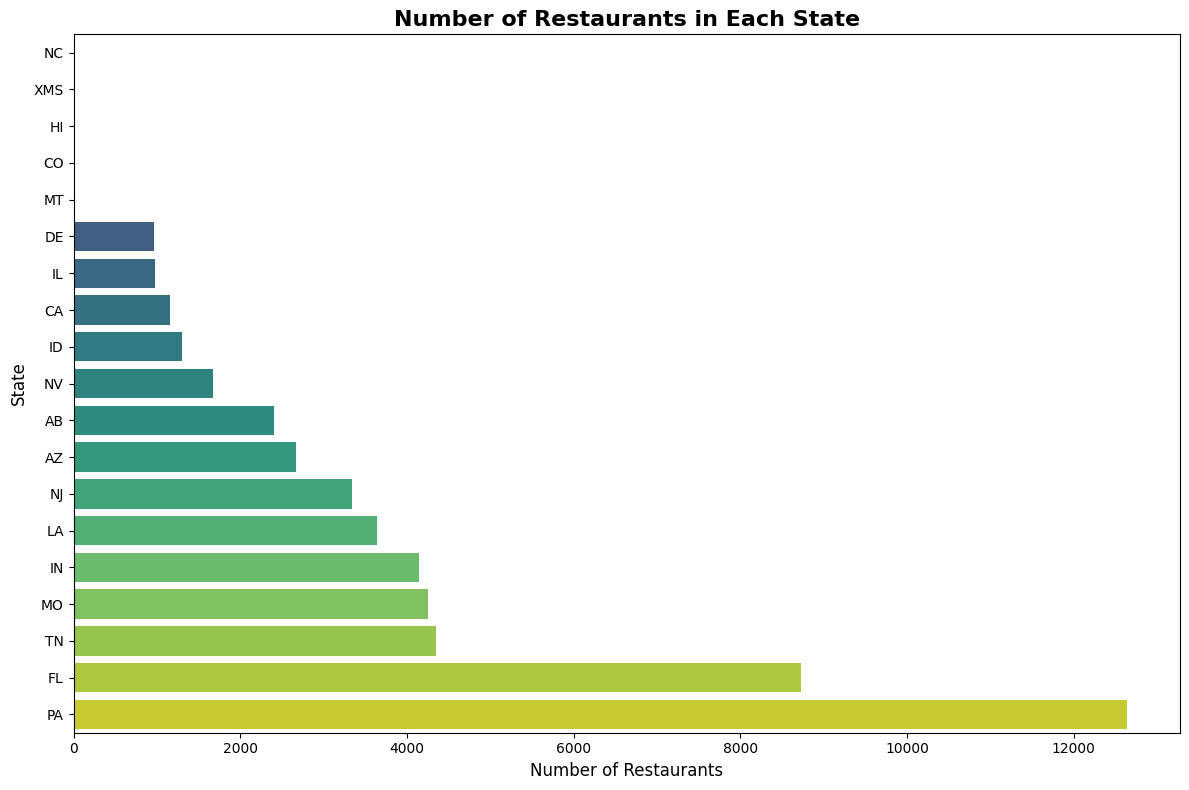

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Query 10: Get the number of restaurants in each state
query10 = """
SELECT state, COUNT(*) AS num_restaurants 
FROM business_table 
WHERE categories LIKE '%Restaurant%' 
GROUP BY state 
ORDER BY num_restaurants DESC;
"""
df10 = pd.read_sql_query(query10, engine)

# Sort the data by the number of restaurants for better visualization
df10_sorted = df10.sort_values(by='num_restaurants', ascending=True)

# Horizontal Bar Chart Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='num_restaurants', y='state', data=df10_sorted, palette='viridis')
plt.xlabel("Number of Restaurants", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.title("Number of Restaurants in Each State", fontsize=16, fontweight='bold')

# Save the figure to a file
plt.tight_layout()
plt.savefig("number_of_restaurants_per_state.png", dpi=300, bbox_inches="tight")  # Save as PNG with high quality
plt.show()


/tmp/ipykernel_30/3516339465.py:37: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us_states_contiguous.geometry.centroid.x,
/tmp/ipykernel_30/3516339465.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us_states_contiguous.geometry.centroid.y,


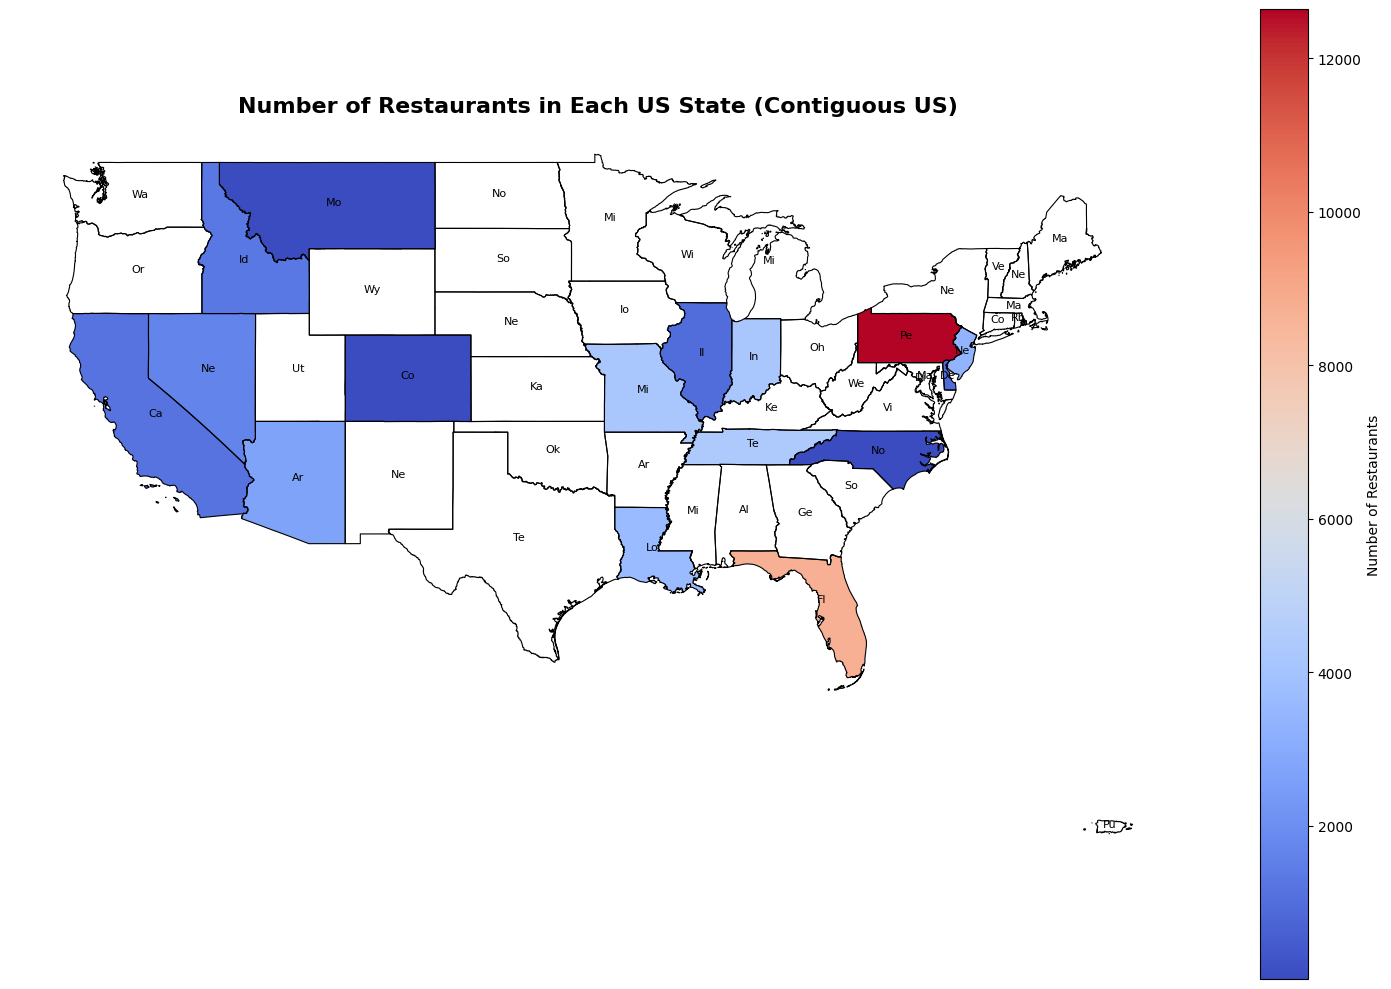

In [56]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load GeoJSON for US states
us_states = gpd.read_file("https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json")

# Map state abbreviations to full names
state_abbreviations = {
    "PA": "Pennsylvania", "FL": "Florida", "TN": "Tennessee", "MO": "Missouri",
    "IN": "Indiana", "LA": "Louisiana", "NJ": "New Jersey", "AZ": "Arizona",
    "AB": "Alberta", "NV": "Nevada", "ID": "Idaho", "CA": "California",
    "IL": "Illinois", "DE": "Delaware", "CO": "Colorado", "HI": "Hawaii",
    "NC": "North Carolina", "XMS": "Miscellaneous", "MT": "Montana"
}
df10['State_Name'] = df10['state'].map(state_abbreviations)

# Rename column and merge with GeoDataFrame
us_states = us_states.rename(columns={"NAME": "State_Name"})
us_states = us_states.merge(df10, on="State_Name", how="left")

# Filter for contiguous US
us_states_contiguous = us_states[~us_states['State_Name'].isin(["Alaska", "Hawaii"])]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
us_states_contiguous.boundary.plot(ax=ax, edgecolor="black", linewidth=0.8)
us_states_contiguous.plot(
    column="num_restaurants",
    cmap="coolwarm",
    legend=True,
    legend_kwds={"label": "Number of Restaurants", "orientation": "vertical"},
    ax=ax
)

# Add State Labels
for x, y, label in zip(
    us_states_contiguous.geometry.centroid.x,
    us_states_contiguous.geometry.centroid.y,
    us_states_contiguous["State_Name"],
):
    plt.text(x, y, label[:2], fontsize=8, ha="center", color="black")

# Title and Layout
plt.title("Number of Restaurants in Each US State (Contiguous US)", fontsize=16, fontweight="bold")
plt.axis("off")

# Save the figure to a file
plt.tight_layout()
plt.savefig("us_restaurants_map.png", dpi=300, bbox_inches="tight")  # Save as PNG with high quality
plt.show()
